In [1]:
# Setup

import tensorflow.keras as keras
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import (
    Activation,
    BatchNormalization,
    Conv2D,
    Dense,
    Flatten,
    MaxPooling2D,
)
from tensorflow.keras.optimizers import SGD

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape = (10000, 32, 32, 3)
y_test.shape = (10000, 1)


In [3]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape = {y_test.shape}')

y_train.shape = (50000, 10)
y_test.shape = (10000, 10)


In [4]:
net = Sequential() 
# the first convolutional layer 
net.add(Conv2D(8, (3, 3), padding='same', input_shape=(32,32, 3))) 
net.add(BatchNormalization()) 
net.add(Activation('relu')) 
 
net.add(MaxPooling2D((2, 2),strides=2)) 
 
# the second convolutional layer 
net.add(Conv2D(16, (3, 3), padding='same')) 
net.add(BatchNormalization()) 
net.add(Activation('relu')) 
 
net.add(MaxPooling2D((2, 2),strides=2)) 
 
# the third convolutional layer 
net.add(Conv2D(32, (3, 3), padding='same')) 
net.add(BatchNormalization()) 
net.add(Activation('relu')) 
 
# Classification 
net.add(Flatten()) 
net.add(Dense(64, activation='relu')) 
net.add(Dense(10, activation='softmax')) 
 
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 8)        32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 16)       6

In [5]:
net.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [6]:
epochs = 150
batch_size = 256
validation_split = 0.15

history = net.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split
)

Epoch 1/150
167/167 [==============================] - 4s 10ms/step - loss: 1.8916 - accuracy: 0.3227 - val_loss: 1.9865 - val_accuracy: 0.2783
Epoch 2/150
167/167 [==============================] - 1s 8ms/step - loss: 1.5616 - accuracy: 0.4400 - val_loss: 2.3958 - val_accuracy: 0.2649
Epoch 3/150
167/167 [==============================] - 1s 8ms/step - loss: 1.4329 - accuracy: 0.4843 - val_loss: 5.2751 - val_accuracy: 0.1087
Epoch 4/150
167/167 [==============================] - 1s 8ms/step - loss: 1.3594 - accuracy: 0.5132 - val_loss: 3.1701 - val_accuracy: 0.2188
Epoch 5/150
167/167 [==============================] - 1s 8ms/step - loss: 1.2921 - accuracy: 0.5381 - val_loss: 2.2825 - val_accuracy: 0.2603
Epoch 6/150
167/167 [==============================] - 1s 8ms/step - loss: 1.2476 - accuracy: 0.5553 - val_loss: 4.5284 - val_accuracy: 0.2131
Epoch 7/150
167/167 [==============================] - 1s 8ms/step - loss: 1.2080 - accuracy: 0.5703 - val_loss: 1.8694 - val_accuracy: 0.386

In [7]:
import seaborn as sn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_classified, y_true):
    # Compute confusion matrix
    c_mat = confusion_matrix(y_true, y_classified)

    group_counts = (f"{value:.0f}" for value in c_mat.flatten())
    group_percentages = (f"{value:.0f}" for value in c_mat.flatten() / np.sum(c_mat))
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

    plt.figure(figsize=(12,10))
    sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
    plt.title("Confusion Matrix")
    plt.ylabel('Output Class')
    plt.xlabel('Target Class')

313/313 [==============================] - 1s 3ms/step - loss: 6.5365 - accuracy: 0.2803
Test loss: 6.537
Test accuracy: 0.280


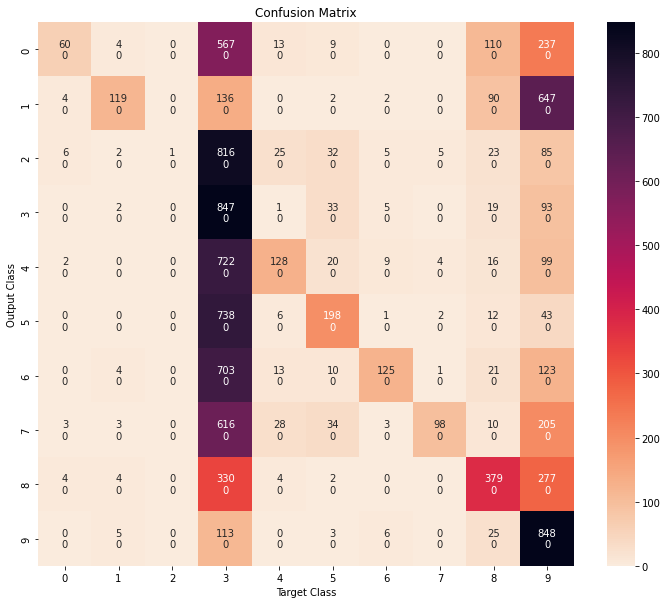

In [8]:
# Evaluate the trained model using keras built-in function
score = net.evaluate(X_test, y_test)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}') 

y_classified = np.argmax(net.predict(X_test), axis=1)
y_true =  np.argmax(y_test, axis=1)
# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)

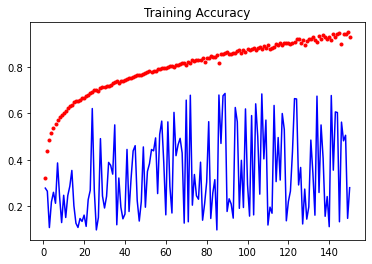

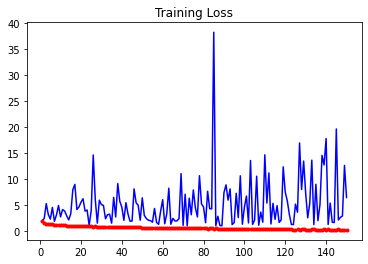

In [13]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, val_acc,'b')
plt.plot(epochs, acc,'r.')
plt.title("Training Accuracy")

plt.figure()
plt.plot(epochs, val_loss,'b')
plt.plot(epochs,loss,'r.')
plt.title("Training Loss")
plt.show()